# Ford GoBike System Data

## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.
In this project, an exploratory analysis will be done over Ford GoBike data, a bike-share system provider.

## Preliminary Wrangling

+ Source data : https://www.fordgobike.com/system-data
+ It includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
+ Multiple data files will need to be joined together in case a full year’s coverage is needed. In this project, we will focus on the record of individual trips taken in from June, 2018 to May, 2019.

+ The features included in this dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

In [1]:
# import all packages and set plots to be embedded inline
import os
import time
import glob
import numpy as np
import pandas as pd
import helpers as hp 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Reading all csv files at once and append them at one dataframe
path = r"D:\GitLabRepos\GoBike\gobike"
all_files = glob.glob(os.path.join(path, "*.csv"))
print("Concatincating files to one file...")
start_time = time.time()
df = pd.concat(
    (pd.read_csv(
        file, parse_dates=['start_time', 'end_time', 'member_birth_year'],
        dtype={"start_station_id":"O", "end_station_id":"O", "bike_id":"O"},
        nrows=10000
    ) for file in all_files), ignore_index=True
)
end_time = time.time()
print("done!")
print("It tooks {} seconds to read and concatnate datasets".format(round(end_time - start_time, 2)))

Concatincating files to one file...
done!
It tooks 0.77 seconds to read and concatnate datasets


In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.659,2018-07-01 15:57:33.316,76,McCoppin St at Valencia St,37.771662,-122.422423,95,Sanchez St at 15th St,37.766219,-122.431060,2100,Subscriber,1975-01-01,Male,Yes
1,60358,2018-06-30 21:48:19.557,2018-07-01 14:34:18.100,248,Telegraph Ave at Ashby Ave,37.855956,-122.259795,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,653,Customer,NaT,NaN,No
2,63654,2018-06-30 20:26:53.031,2018-07-01 14:07:47.232,23,The Embarcadero at Steuart St,37.791464,-122.391034,50,2nd St at Townsend St,37.780526,-122.390288,3235,Subscriber,1962-01-01,Female,No
3,50508,2018-06-30 20:29:59.813,2018-07-01 10:31:48.250,58,Market St at 10th St,37.776619,-122.417385,88,11th St at Bryant St,37.770030,-122.411726,3675,Subscriber,1992-01-01,Male,No
4,51697,2018-06-30 18:24:56.696,2018-07-01 08:46:33.739,196,Grand Ave at Perkins St,37.808894,-122.256460,272,Woolsey St at Sacramento St,37.850578,-122.278175,3232,Customer,1989-01-01,Female,No


# Exploratory Phase

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             120000 non-null  int64         
 1   start_time               120000 non-null  datetime64[ns]
 2   end_time                 120000 non-null  datetime64[ns]
 3   start_station_id         119324 non-null  object        
 4   start_station_name       119324 non-null  object        
 5   start_station_latitude   120000 non-null  float64       
 6   start_station_longitude  120000 non-null  float64       
 7   end_station_id           119324 non-null  object        
 8   end_station_name         119324 non-null  object        
 9   end_station_latitude     120000 non-null  float64       
 10  end_station_longitude    120000 non-null  float64       
 11  bike_id                  120000 non-null  object        
 12  user_type       

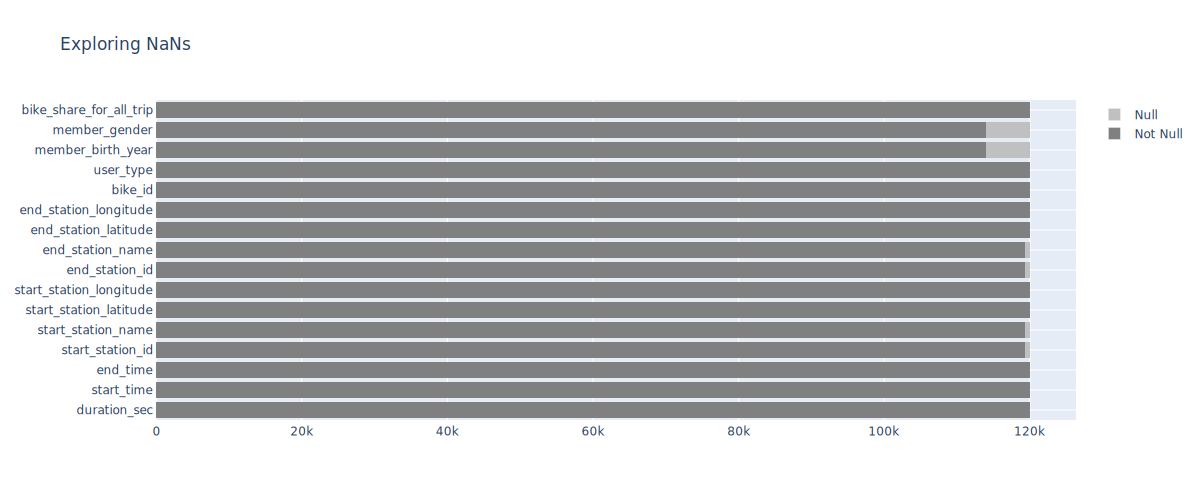

In [5]:
# exploring NaNs
hp.explore_nans(df, "Exploring NaNs", chart_image=True)

In [6]:
# do some data cleaning : drop nan , remove some insignificant features, adding trip duration in minutes feature 
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.dropna(inplace=True)

In [7]:
df.shape

(113327, 12)

In [8]:
df.describe()

,duration_sec
count,113327.000000
mean,829.337104
std,2143.218472
min,61.000000
25%,347.000000
50%,554.000000
75%,877.000000
max,86205.000000


In [9]:
df.describe(include=['O'])

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip
count,113327,113327,113327,113327,113327,113327,113327,113327
unique,366,385,369,388,5652,2,3,2
top,67,San Francisco Caltrain Station 2 (Townsend St...,67,San Francisco Caltrain Station 2 (Townsend St...,4452,Subscriber,Male,No
freq,2262,2262,3190,3190,117,97873,83159,102015


### What is the structure of your dataset?

> It has a shape of 12 columns and 113327 rows after concatinating the 12-months data files available

### What is/are the main feature(s) of interest in your dataset?

>  
##### Univariate analysis
+ What is the average trip duration?
+ Who does affect more: customers or subscribers?
+ is gender a suprior factor? 

>
##### Bivariate analysis
+ Is season a factor to affect on trip duration?
+ User type vs gender, does they contribute to the analysis?
+ Does age groupings affect the user type contributions to the bikeshare system?

>
##### Multivariate analysis
+ Is season vs months a factor of interest to affect on trip duration?
+ Is season vs days a factor of interest to affect on trip duration?
+ Age groupings vs season and trip durations. Does they affect?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 'duration_sec', 'start_time', 'user_type', 'member_gender', age_groups, seasons

# Explanatory Phase

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Question 1 : What is the average trip duration?

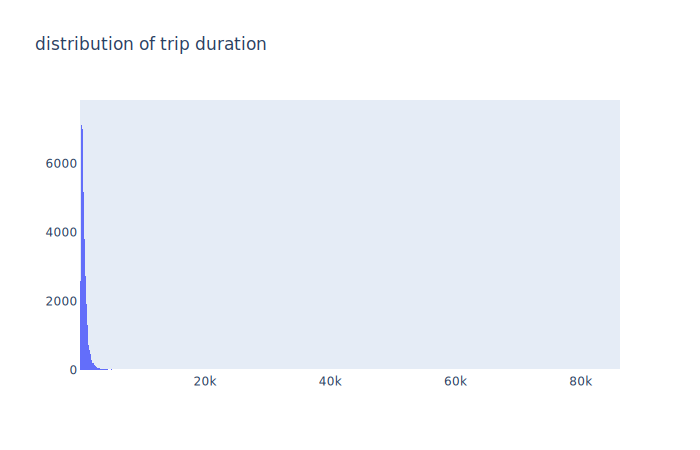

In [10]:
# Let's plot the distribution of trip duration.  
data = go.Histogram(x=df["duration_sec"])
layout = go.Layout(
    title="distribution of trip duration", xaxis={"showgrid":False}, yaxis= {"showgrid":False}
)
fig = go.Figure(data, layout)
fig.show(renderer='svg')

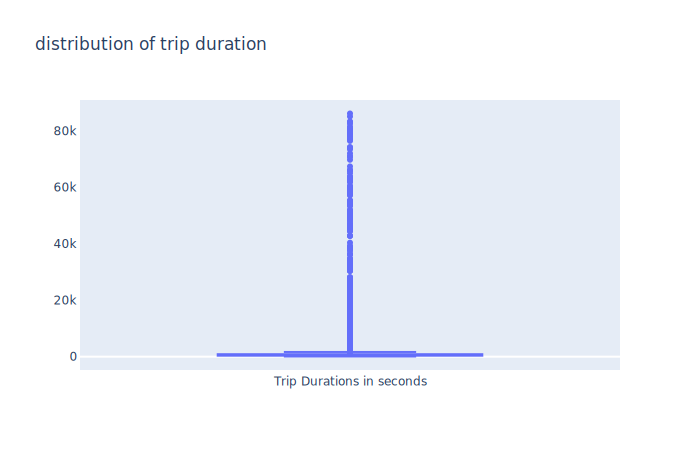

In [11]:
data = go.Box(y=df["duration_sec"], name="Trip Durations in seconds")
layout = go.Layout(
    title="distribution of trip duration", xaxis={"showgrid":False}, yaxis= {"showgrid":False}
)
fig = go.Figure(data, layout)
fig.show(renderer='svg')

> + From the two charts above, I can see a right skewed with a long tail on the right meaning that the data has a low variance.
> + Although these distribution charts showed us the shape of the data, they're still not enough to interpret and they need more percise look. A way to enhance this is to use log transformation which will be done on the next cell.
> + Measuring trip using seconds is not reasonable. I would change the `duration_sec` to `duration_min` before I add any log transformation.

In [12]:
# adding new columns to answer the question more precisely
df["duration_min"] = df["duration_sec"] / 60
df['duration_min_log'] = np.log10(df['duration_min'])

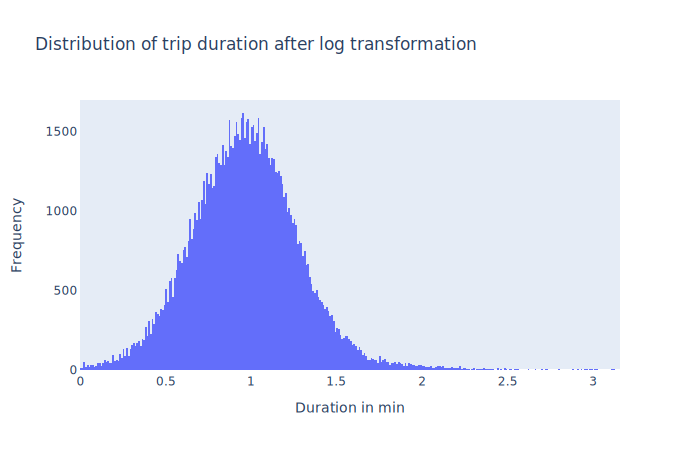

In [13]:
# Let's plot the distribution of trip duration.  
data = go.Histogram(x=df["duration_min_log"])
layout = go.Layout(
    title="Distribution of trip duration after log transformation",
    xaxis={"showgrid":False, "title":"Duration in min"},
    yaxis= {"showgrid":False, "title":"Frequency"}
)
fig = go.Figure(data, layout)
fig.show(renderer='svg')

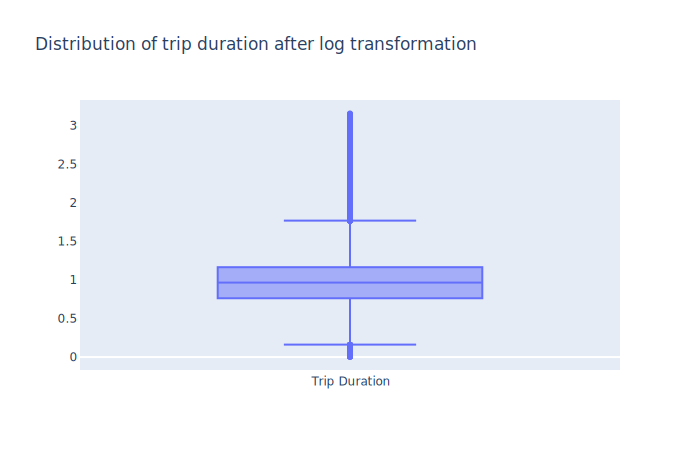

In [14]:
data = go.Box(y=df["duration_min_log"], name="Trip Duration")
layout = go.Layout(
    title="Distribution of trip duration after log transformation", xaxis={"showgrid":False}, yaxis= {"showgrid":False}
)
fig = go.Figure(data, layout)
fig.show(renderer='svg')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As seen before, it is difficult to read the plot in trip duration per second so that I tend to perform log transformation based on base 10 to plot a normally distributed shape and answer the question precisely. It looks like that most of the trips takes 10 minutes in average - short trips.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I created a new variable called `duration_min_log` that holds the trip duration in minutes after a log transformation has been done.

### Question 2: Who does affect more: customers or subscribers?

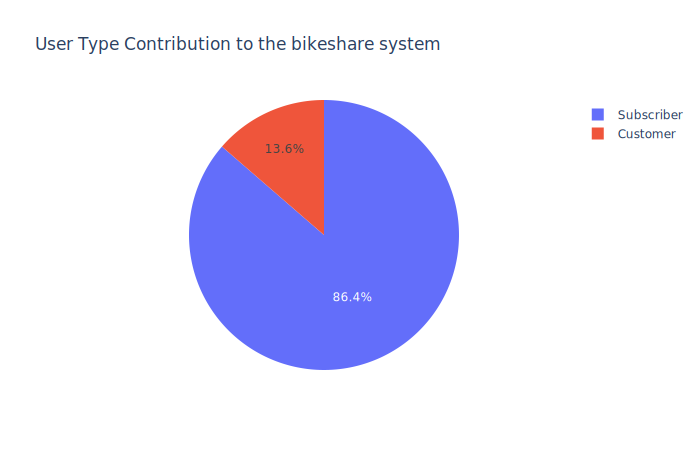

In [15]:
# pie chart for `user_type`
count = df['user_type'].value_counts().reset_index()
fig = go.Figure(
    go.Pie(
        labels=count['index'].tolist(),
        values=count['user_type'].tolist(),
        sort=True,
        direction='clockwise'
    ),
    go.Layout(title="User Type Contribution to the bikeshare system")
)
fig.show(renderer='svg')

> It's clear that the subscriber user type is affecting the most of data with more 85% of contribution what may lead to regular users who only depend on bikes.

### Question 3: is gender a suprior factor?

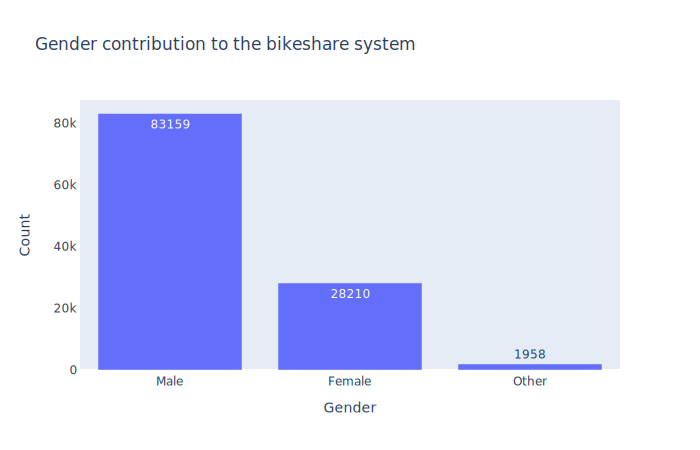

In [16]:
# plotting bar chart for gender column
count = df['member_gender'].value_counts().reset_index()
fig = go.Figure(
    go.Bar(
        x=count['index'].tolist(),
        y=count['member_gender'].tolist(),
        text=count['member_gender'].astype(str).tolist(),
        textposition="auto"
    ),
    go.Layout(
        title="Gender contribution to the bikeshare system",
        xaxis={"showgrid":False, "title":"Gender"},
        yaxis={"showgrid":False, "title":"Count"}
    )
)
fig.show(renderer='svg')

> The bar plot proves that males are suprior three times than females which, as I guess, because male pays attention more to this kind of transportation and may some of them take it as a kinds of exercising. Regarding `others` gender type, it may refer to those who wouldn't like to express their gender to avoid any gender abuse or baise.

## Bivariate Exploration

### Question 4. Is season a factor to affect on trip duration?
> Answering this question requires creating new columns from the `start_time` column; `start_month`, `start_day`, `start_hour` and `summer` column for heatmap plot.

In [17]:
# create the columns
df['start_month'], df['start_day'], df['start_hour'] = (
    df['start_time'].dt.month_name(),
    df['start_time'].dt.day_name(),
    df['start_time'].dt.hour,
)
df["season"] = df.apply(hp.seasons, axis=1)  
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_min_log,start_month,start_day,start_hour,season
0,59088,2018-06-30 23:32:44.659,2018-07-01 15:57:33.316,76,McCoppin St at Valencia St,95,Sanchez St at 15th St,2100,Subscriber,1975-01-01,Male,Yes,984.800000,2.993348,June,Saturday,23,Summer
2,63654,2018-06-30 20:26:53.031,2018-07-01 14:07:47.232,23,The Embarcadero at Steuart St,50,2nd St at Townsend St,3235,Subscriber,1962-01-01,Female,No,1060.900000,3.025674,June,Saturday,20,Summer
3,50508,2018-06-30 20:29:59.813,2018-07-01 10:31:48.250,58,Market St at 10th St,88,11th St at Bryant St,3675,Subscriber,1992-01-01,Male,No,841.800000,2.925209,June,Saturday,20,Summer
4,51697,2018-06-30 18:24:56.696,2018-07-01 08:46:33.739,196,Grand Ave at Perkins St,272,Woolsey St at Sacramento St,3232,Customer,1989-01-01,Female,No,861.616667,2.935314,June,Saturday,18,Summer
7,7224,2018-06-30 23:01:00.400,2018-07-01 01:01:24.433,284,Yerba Buena Center for the Arts (Howard St at ...,284,Yerba Buena Center for the Arts (Howard St at ...,779,Subscriber,1989-01-01,Male,No,120.400000,2.080626,June,Saturday,23,Summer


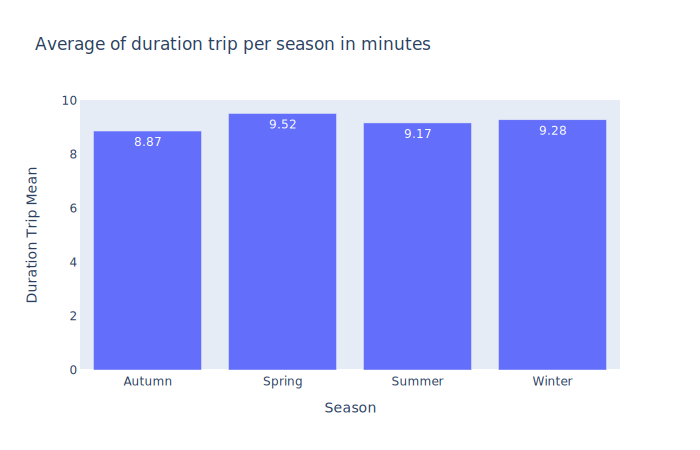

In [18]:
# seasons vs median duration trips
season_duration_mean = df.groupby('season')['duration_min'].median().reset_index()
fig = go.Figure(
    go.Bar(
        x=season_duration_mean['season'].tolist(),
        y=season_duration_mean['duration_min'].tolist(),
        text=round(season_duration_mean['duration_min'], 2).astype(str).tolist(),
        textposition="auto"
    ),
    go.Layout(
        title="Average of duration trip per season in minutes",
        xaxis={"showgrid":False, "title":"Season"},
        yaxis={"showgrid":False, "title":"Duration Trip Mean"}
    )
)
fig.show(renderer='svg')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Due to outliers that exit heavily in this data, I chose to measure the average by median not mean to not mislead the results. Despite there is no significant difference in trip dutaion across seasons, the plot appears that spring has the longest median of trip duration. This was expected for me as in spring we have a very relxing whether experience that motivates going bicycling.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Actually, whether doesn't affect that much in SF. I don't know why but this might go back to unchanging extreme whether conditions.

### Question 5: User type vs gender, does they contribute to the analysis?

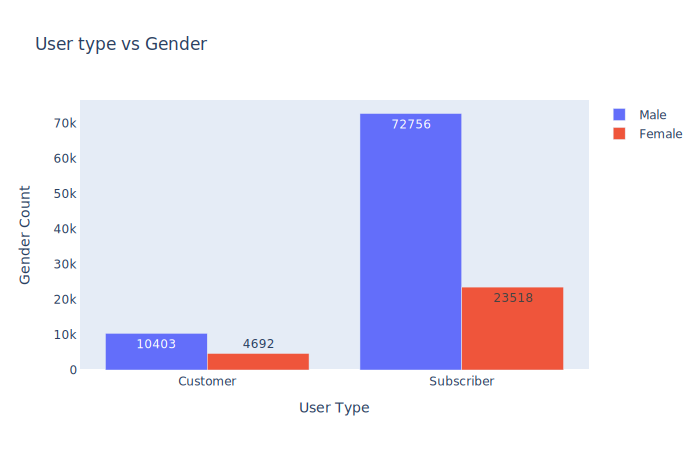

In [19]:
# ignoring `other` type of gender
df['member_gender'].replace("Other", np.nan, inplace=True) 
# plotting groupped bar chart after useing `groupby()` with user_type and member_gender
user_type_vs_gender = df.groupby(['user_type'])['member_gender'].value_counts().unstack().reset_index()
fig = go.Figure(
    [
        go.Bar(
            name="Male",
            x=user_type_vs_gender['user_type'].tolist(),
            y=user_type_vs_gender['Male'].tolist(),
            text=user_type_vs_gender['Male'].astype(str).tolist(),
            textposition="auto",
        ),
        go.Bar(
            name="Female",
            x=user_type_vs_gender['user_type'].tolist(),
            y=user_type_vs_gender['Female'].tolist(),
            text=user_type_vs_gender['Female'].astype(str).tolist(),
            textposition="auto"
        )
    ],
    go.Layout(
        title="User type vs Gender",
        xaxis={"showgrid":False, "title":"User Type"},
        yaxis={"showgrid":False, "title":"Gender Count"},
        barmode='group'
    )
)
fig.show(renderer='svg')

> The bivariate relationship between user type and gender doesn't surprise us as it gives the same result for gender analysis in the bar chart above. The whole difference comes in distributing gender over customer and subscriber user types which assure that, in case SF bikeshare system interests in advertising, they can pay for more marketing for males to encourage them use more bikes which may help in improving health and environmental conditions quality.

### Question 6: Does age groupings affect the user type contributions to the bikeshare system?
> Answering this question will require creating new column called `age_group`

In [20]:
# creating `age` column
df['age'] = round(df['start_time'].sub(df['member_birth_year'], axis=0) / np.timedelta64(1, 'Y'), 0).astype(int)
# dropping outliers 
df = df[np.abs(df['age']-df['age'].mean()) <= (3*df['age'].std())]
# creating `age_groups` column
df['age_groups'] = df.apply(hp.age_group, axis=1)

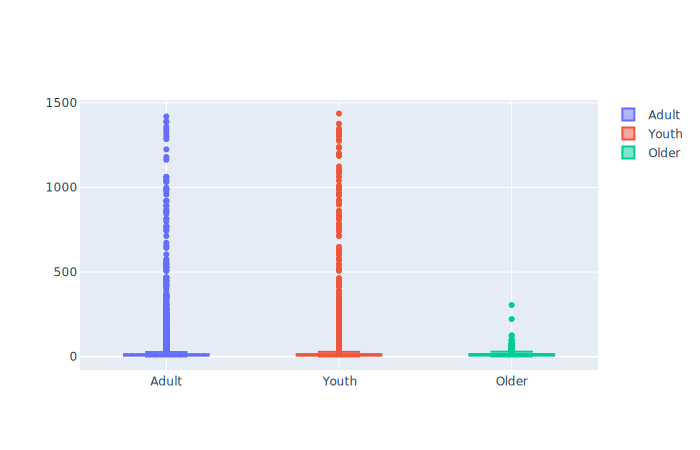

In [21]:
fig = go.Figure()
fig.add_trace(go.Box(y=df.query("age_groups == 'Adult'")['duration_min'].tolist(), name="Adult", boxmean=True))
fig.add_trace(go.Box(y=df.query("age_groups == 'Youth'")['duration_min'].tolist(), name="Youth", boxmean=True))
fig.add_trace(go.Box(y=df.query("age_groups == 'Older'")['duration_min'].tolist(), name="Older", boxmean=True))
fig.show(renderer='svg')

> I used boxplots to show the bivariate relation between trip duration in minutes and different age groups. From the three charts above, the three categories share the same trip duration, around 10 minutes per trip, however, the olders take the shortest trip durations - I think this is due to their age and more controled life style. Youth and adults share the same distribution almost with a little difference in mean. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question 7. Is season vs months/days a factor of interest to affect on trip duration?

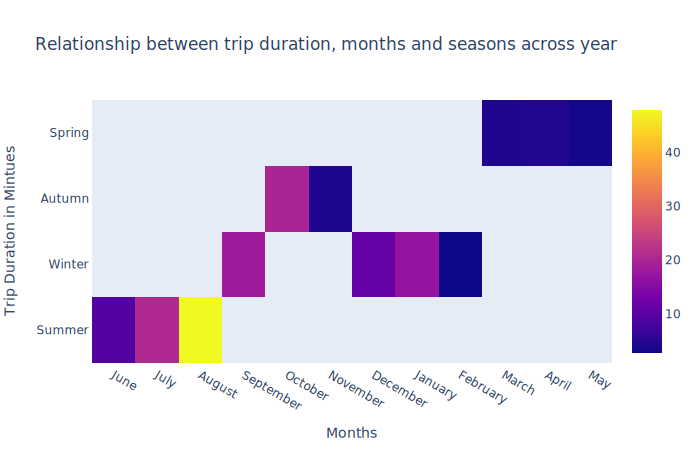

In [22]:
fig = go.Figure(
    go.Heatmap(
        z=df['duration_min'].tolist(),
        x=df['start_month'].tolist(),
        y=df['season'].tolist(),
    ),
    go.Layout(
        title="Relationship between trip duration, months and seasons across year",
        xaxis={"showgrid":False, "title":"Months"},
        yaxis={"showgrid":False, "title":"Trip Duration in Mintues"},
        xaxis_type="category"
    )
)
fig.show(renderer='svg')

> I've created season column that to plot multivariate exploration between season, months and trip duration. From the heatmap above, we can see that longest trip durations are in the summer specifically in August. Winter, in Sep and Jan, comes in the second place, while spring months come with shortest trip durations across the year

### Question 8: Is season vs days a factor of interest to affect on trip duration?

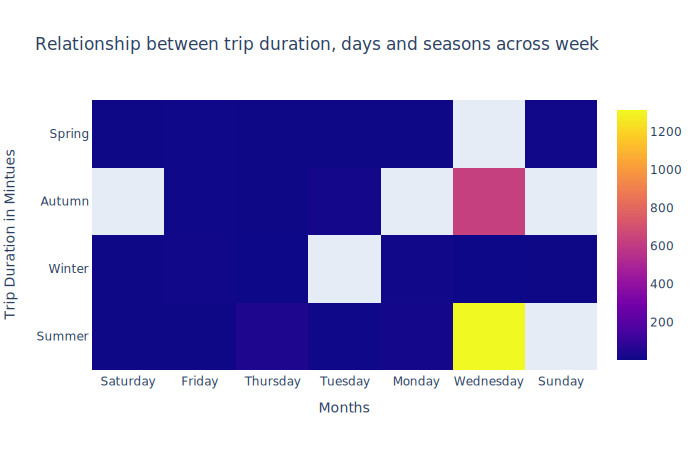

In [23]:
fig = go.Figure(
    go.Heatmap(
        z=df['duration_min'].tolist(),
        x=df['start_day'].tolist(),
        y=df['season'].tolist(),
    ),
    go.Layout(
        title="Relationship between trip duration, days and seasons across week",
        xaxis={"showgrid":False, "title":"Months"},
        yaxis={"showgrid":False, "title":"Trip Duration in Mintues"},
        xaxis_type="category",
    )
)
fig.show(renderer='svg')

> The second heatmap also prove the same fact that the summer has the peak duration of trips with high frequency in Wednesdays. An interesting point is that useres take long duration trips in the summer although it's hot.



### Question 9: Age groupings vs season and trip durations. Does they affect?

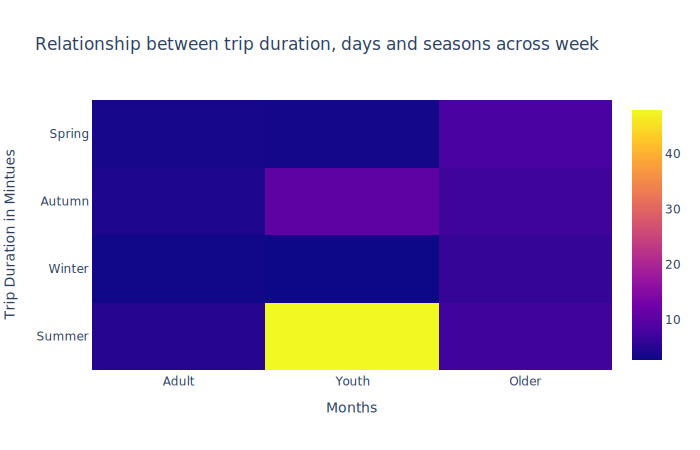

In [24]:
fig = go.Figure(
    go.Heatmap(
        z=df['duration_min'].tolist(),
        x=df['age_groups'].tolist(),
        y=df['season'].tolist(),
    ),
    go.Layout(
        title="Relationship between trip duration, days and seasons across week",
        xaxis={"showgrid":False, "title":"Months"},
        yaxis={"showgrid":False, "title":"Trip Duration in Mintues"},
        xaxis_type="category",
    )
)
fig.show(renderer='svg')

> As shown, youth in the summer takes the most of trips with longest durations. This was expected due to their age.